# kNN classifer

## 1. Business understanding

The goal of the analysis is to analyse breast tumour samples and declare it's variables as malignant or benign using kNN classifier. This analysis uses data from Diagnostic Wisconsin Breast Cancer Database.

## 2. Data understanding

The data includes Data Description:

Number of instances: 569
Number of features: 30
Target variable: Cancer diagnosis (M = Malignant, B = Benign)
Feature characteristics: Real-valued, computed from cell nucleus images

The features describe various characteristics of cell nuclei present in the digitized image, including:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

## 3. Data preparation

In [15]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

#Data preparation and preprocessing
df = pd.read_csv('datasets/wdbc.csv').drop(columns = ['ID'])

Dataset is readed from the csv file while the ID column is dropped.

In [16]:
df['Diagnosis'] = pd.Categorical(df['Diagnosis'])

df['Diagnosis'] = df['Diagnosis'].astype(str)
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})
df['Diagnosis'] = df['Diagnosis'].astype('category')

X = df.drop(columns = 'Diagnosis')
Y = df['Diagnosis'] # targets

C:\Users\vilts\AppData\Local\Temp\ipykernel_8004\1393105479.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})


The values of Diagnosis columns are replaced from M and B to 1 and 0. The X and Y variables are created for seperating features and target.

In [17]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.Diagnosis.unique()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

The features in X are standardized and stored in X_scaled.

## 4. Modelling

In [18]:
# Training
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=123)

Dataset is splitted into a training sets and a testing sets. 70% of the data will be used for training while 30% for testing.

The training set data will be trained using the kNN classifier.

In [19]:
# Experiment with a few choices of the hyperparameter k, and report the findings.
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Now the kNN classifier is trained with the training data and tested with the testing data. Also Y predictions have been generated here using X test set.

## 5. Evaluation

Performance metrics are measured with training and testing sets.

In [20]:
#Performance metrics
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy_test:.2f}")

y_train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on the training set: {accuracy_train:.2f}")

precision_scores = precision_score(y_test, y_pred)
recall_scores = recall_score(y_test, y_pred)
print(f"Precision: {precision_scores:.2f}")
print(f"Recall: {recall_scores:.2f}")

Accuracy on the test set: 0.97
Accuracy on the training set: 0.96
Precision: 1.00
Recall: 0.93


This means that this model matches actual results with 97% accuracy on the test set and 96% accuracy on the training set.

## 6. Deployment

The results are going to be generated as a confusion matrix.

Text(0, 0.5, 'True Labels')

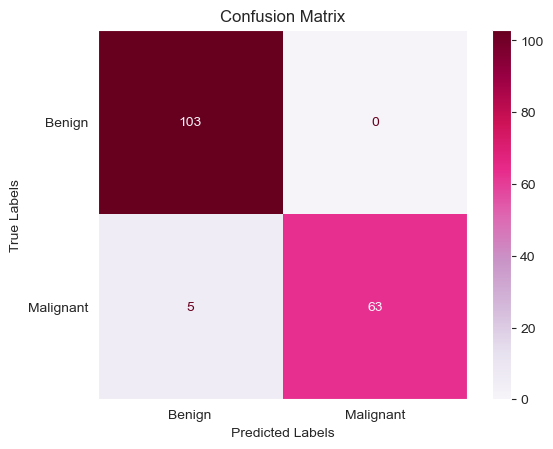

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

# Plot the confusion matrix with additional parameters for clarity
cmd.plot(cmap='PuRd')
cmd.ax_.grid(False)
cmd.ax_.set_title('Confusion Matrix')
cmd.ax_.set_xlabel('Predicted Labels')
cmd.ax_.set_ylabel('True Labels')

The confusion matrix shows that:
- The model identifies all the 103 benign samples correctly.
- Five of the malignant samples are misclassified as benign.

